# Financial Data and Preprocessing

## Getting data from Yahoo Finance

In [38]:
# Installing Yahoo Finance library
#pip install yfinance

1. Importing libraries

In [39]:
import pandas as pd
import yfinance as yf

2. Downloading data

In [40]:
df_yahoo = yf.download('AAPL', start='2000-01-01',
                      end='2010-12-31',
                      progress=False)

3. Inspect the data

In [41]:
print(f'Downloaded {df_yahoo.shape[0]} rows of data')

df_yahoo.head()

Downloaded 2767 rows of data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-12-31,0.901228,0.918527,0.888393,0.917969,0.784880,163811200
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.854541,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.782494,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.793945,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.725238,767972800


## Download the data from Quandl

1. import the libraries

In [42]:
# pip install Quandl

In [43]:
import pandas as pd
import quandl 

2. Authenticate using the personal API key

To get the api key, login on this site: <a>https://data.nasdaq.com/</a> , and go to account_profile to get api

In [44]:
#QUANDL_KEY = '{key}'
QUANDL_KEY = 'gnp-UzdRvRZ6MCW1CwYA'  # replace with your own API key
quandl.ApiConfig.api_key = QUANDL_KEY

3. Download the data

In [45]:
df_quandl = quandl.get(dataset='WIKI/AAPL',
                      start_date='2000-01-01',
                      end_date='2010-12-31')

4. Inspect the data

In [46]:
print(f'Downloaded {df_quandl.shape[0]} rows of data.')
df_quandl.head()

Downloaded 2767 rows of data.


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,4783900.0,0.0,1.0,3.369314,3.614454,3.267146,3.596463,133949200.0
2000-01-04,108.25,110.62,101.19,102.50,4574800.0,0.0,1.0,3.477908,3.554053,3.251081,3.293170,128094400.0
2000-01-05,103.75,110.56,103.00,104.00,6949300.0,0.0,1.0,3.333330,3.552125,3.309234,3.341362,194580400.0
2000-01-06,106.12,107.00,95.00,95.00,6856900.0,0.0,1.0,3.409475,3.437748,3.052206,3.052206,191993200.0
2000-01-07,96.50,101.00,95.50,99.50,4113700.0,0.0,1.0,3.100399,3.244977,3.068270,3.196784,115183600.0


# Converting prices to returns

## How to add it

1. Import the libraries

In [47]:
import pandas as pd
import numpy as np
import yfinance as yf

2. Download the data and keep the adjusted close price only

In [48]:
df = yf.download('AAPL',
                start='2000-01-01',
                end='2010-12-31',
                progress=False)
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

3. Convert adjusted close prices to simple and log returns

<b>simple return</b>

The formula to calculate simple return is: (current_row - prev_row)/(prev_row), to calculate this pandas have inbuilt function- pct_change()

<b>Log returns </b>

The formula to log return is log(current_row - next_row), to perform this computation, we can shift each row forward. Thus we can easily subtract the actual column with the shifted column.

<b><i>Note:</b></i> The first row of this computed column will always be NaN as we don't be having previous record to subtract.

In [49]:
df.head()

,adj_close
Date,
1999-12-31,0.784880
2000-01-03,0.854541
2000-01-04,0.782494
2000-01-05,0.793945
2000-01-06,0.725238


In [50]:
df['simple_rtn'] = df.adj_close.pct_change()
df['log_rtn'] = np.log(df.adj_close/df.adj_close.shift(1))

4. Inspect the output

In [51]:
df.head()

,adj_close,simple_rtn,log_rtn
Date,,,
1999-12-31,0.784880,NaN,NaN
2000-01-03,0.854541,0.088754,0.085034
2000-01-04,0.782494,-0.084310,-0.088077
2000-01-05,0.793945,0.014633,0.014527
2000-01-06,0.725238,-0.086538,-0.090514


There's more

1. Import libraries and authenticate

In [52]:
import pandas as pd
import quandl

QUANDL_KEY = 'gnp-UzdRvRZ6MCW1CwYA' # replace with your own key
quandl.ApiConfig.api_key = QUANDL_KEY

2. Create a DataFrame with all possible dates and left join the prices on it

<b>fillna(method='ffill')</b>

Since on weekends the stock market is closed, so if you observe we have some skipped dates in our dataset. To fill that we will left-join complete dates from  1999-12-31 to 2010-12-31 and fill the missing values (i.e values for weekend) using 'ffill' (aka forward fill) which basically fills one prior value of that null (if 2000-01-05 & 2000-01-06 is weekend then we will fill value of 2000-01-04) 

<b>asfreq('M')</b>

To get the values of month end. (Try putting asfreq('Y'), this will give you year end values)

In [53]:
df_all_dates = pd.DataFrame(index=pd.date_range(start='1999-12-31',
                                               end='2010-12-31'))

df = df_all_dates.join(df[['adj_close']], how='left').fillna(method='ffill').asfreq('M')

3. Download inflation data from Quandl

In [55]:
df_cpi = quandl.get(dataset='RATEINF/CPI_USA',
                   start_date='1999-01-01',
                   end_date='2010-12-31')
df_cpi.rename(columns={'Value': 'cpi'}, inplace=True)

4. Merging inflation data to prices

In [57]:
df_merged = df.join(df_cpi, how='left')

In [58]:
df_merged

,adj_close,cpi
1999-12-31,0.784880,168.300
2000-01-31,0.792036,168.800
2000-02-29,0.875058,169.800
2000-03-31,1.036805,171.200
2000-04-30,0.947104,171.300
...,...,...
2010-08-31,7.423391,218.312
2010-09-30,8.664691,218.439
2010-10-31,9.190834,218.711
2010-11-30,9.501387,218.803


5. Calculate simple return and inflation rate:

In [59]:
df_merged['simple_rtn'] = df_merged.adj_close.pct_change()
df_merged['inflation_rate'] = df_merged.cpi.pct_change()

6. Adjust returns for inflation

Real return(Inflation adjusted return) is calculated as: (simple_return + 1)/(inflation_rate + 1) - 1

In [60]:
df_merged['real_rtn'] = (df_merged.simple_rtn + 1) / (df_merged.inflation_rate + 1) -1
df_merged.head()

,adj_close,cpi,simple_rtn,inflation_rate,real_rtn
1999-12-31,0.784880,168.3,NaN,NaN,NaN
2000-01-31,0.792036,168.8,0.009118,0.002971,0.006129
2000-02-29,0.875058,169.8,0.104820,0.005924,0.098314
2000-03-31,1.036805,171.2,0.184841,0.008245,0.175152
2000-04-30,0.947104,171.3,-0.086516,0.000584,-0.087050


## Changing frequency

0. Obtain the simple returns in case of starting in this recipe

In [70]:
import pandas as pd
import numpy as np
import yfinance as yf

# download data
df = yf.download('AAPL',
                start='2000-01-01',
                end='2020-12-31',
                auto_adjust=False,
                progress=False)

# keep only the adjusted close price
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close': 'adj_close'}, inplace=True)

# calculate log return
df['log_rtn'] = np.log(df['adj_close']/df['adj_close'].shift(1)) 

# remove redundant data
df.drop('adj_close', axis=1, inplace=True)
df.dropna(axis=0, inplace=True)
df.head()

,log_rtn
Date,
2000-01-03,0.085034
2000-01-04,-0.088077
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046282


1. Import the libraries

In [71]:
import pandas as pd

2. Define the function for calculating the realized volatility

In [67]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

3. Calculate monthly realized volatility

In [73]:
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

In [74]:
df_rv.head()

,rv
Date,
2000-01-31,0.251084
2000-02-29,0.147841
2000-03-31,0.243592
2000-04-30,0.212513
2000-05-31,0.184990


4. Annualize the values

In [28]:
df_rv.rv = df_rv.rv * np.sqrt(12)

In [29]:
df, df_rv

(             log_rtn
 Date                
 2000-01-03  0.085034
 2000-01-04 -0.088077
 2000-01-05  0.014527
 2000-01-06 -0.090514
 2000-01-07  0.046281
 ...              ...
 2020-12-23 -0.007000
 2020-12-24  0.007682
 2020-12-28  0.035141
 2020-12-29 -0.013404
 2020-12-30 -0.008563
 
 [5283 rows x 1 columns],
                   rv
 Date                
 2000-01-31  0.869779
 2000-02-29  0.512134
 2000-03-31  0.843824
 2000-04-30  0.736167
 2000-05-31  0.640824
 ...              ...
 2020-08-31  0.339657
 2020-09-30  0.546952
 2020-10-31  0.442290
 2020-11-30  0.275818
 2020-12-31  0.290377
 
 [252 rows x 1 columns])

5. Plot the results

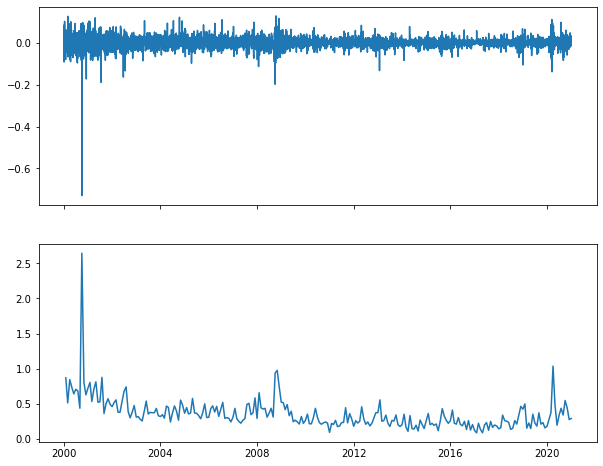

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10,8))
ax[0].plot(df)
ax[1].plot(df_rv)

# plt.tight_layout()
plt.show()